# Notebook initialization:


In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

font = {'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})




import os 
path_to_class_sz = os.getcwd() + '/../../'

Metal device set to: Apple M1 Pro


2023-04-22 10:52:39.144140: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-22 10:52:39.144610: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Settings

In [2]:
# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf)
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66,
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665
}
 
    
common_params = {

'z_min' : 0.0001,
'z_max' : 3.0,
'M_min' : 1.0e10, 
'M_max' : 3.5e15,
    

# 'delta for galaxies' : "200c",
# 'delta for matter density' : "200c",
# 'delta for electron density':"200c",    

'mass function' : 'M500',
'concentration parameter' : 'B13',

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.0005,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0001,


'ell_max': 1600.0,
'ell_min': 2.0,
'dell': 10,

'non_linear' : 'hmcode',

'hm_consistency' : 1,
'x_outSZ': 4.,
'truncate_wrt_rvir':0,
}

# Compute

In [9]:
%%time 
M_std = Class()

M_std.set(common_params)
M_std.set(cosmo_params)
M_std.set({

'output': 'tSZ_1h,tSZ_2h,te_y_y',

'pressure profile':'A10',

"ell_min" : 2,
"ell_max" : 8000,
'dell': 0,
'dlogell': 0.2,
    
'M_min' : 1.0e10, 
'M_max' : 5e15,
       
'hm_consistency' : 1,
'temperature mass relation' : 'standard',
'B': 1.25,

})
M_std.compute_class_szfast()

M_lee = Class()

M_lee.set(common_params)
M_lee.set(cosmo_params)
M_lee.set({

'output': 'tSZ_1h,tSZ_2h,te_y_y',

'pressure profile':'A10',

"ell_min" : 2,
"ell_max" : 8000,
'dell': 0,
'dlogell': 0.2,
    
'M_min' : 1.0e10, 
'M_max' : 5e15,
       
'hm_consistency' : 1,
'temperature mass relation' : 'lee et al 2019',
'B': 1.25,
})
M_lee.compute_class_szfast()

CPU times: user 2.94 s, sys: 362 ms, total: 3.3 s
Wall time: 1.06 s


In [10]:
cl_sz = M_std.cl_sz()
cl_te_y_y_std = M_std.cl_te_y_y()
cl_te_y_y_lee = M_lee.cl_te_y_y()


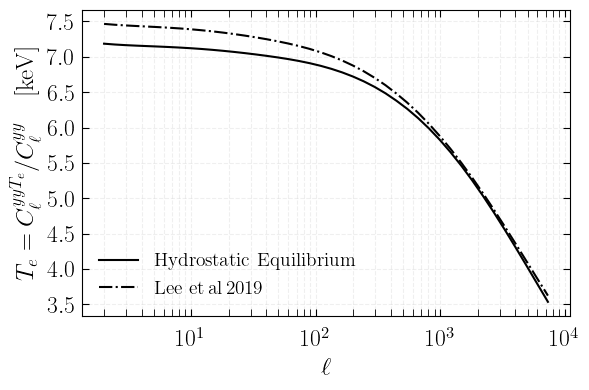

In [11]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(6,4))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')


ax.plot(cl_sz['ell'],np.asarray(cl_te_y_y_std['teyy'])/np.asarray(cl_sz['1h']),label=r'$\mathrm{Hydrostatic\,\,Equilibrium}$',c='k',ls='-')
ax.plot(cl_sz['ell'],np.asarray(cl_te_y_y_lee['teyy'])/np.asarray(cl_sz['1h']),label=r'$\mathrm{Lee\,\,et\,al\,2019}$',c='k',ls='-.')

ax.set_xscale('log')
# ax.set_yscale('log')


ax.set_xlabel('$\ell$',fontsize=18)
ax.set_ylabel(r'$T_e = C_\ell^{yyT_e}/C_\ell^{yy}\quad[\mathrm{keV}]$',fontsize=18)
ax.legend(loc=3,ncol = 1,frameon=False,fontsize=14)

# ax.set_xlim(2,2e4)
# ax.set_ylim(1e-28,1e-17)

fig.tight_layout()
fig.tight_layout()
plt.savefig('figures/class_sz_electron_temperature_cls.pdf')